# Final Decision Tree Models

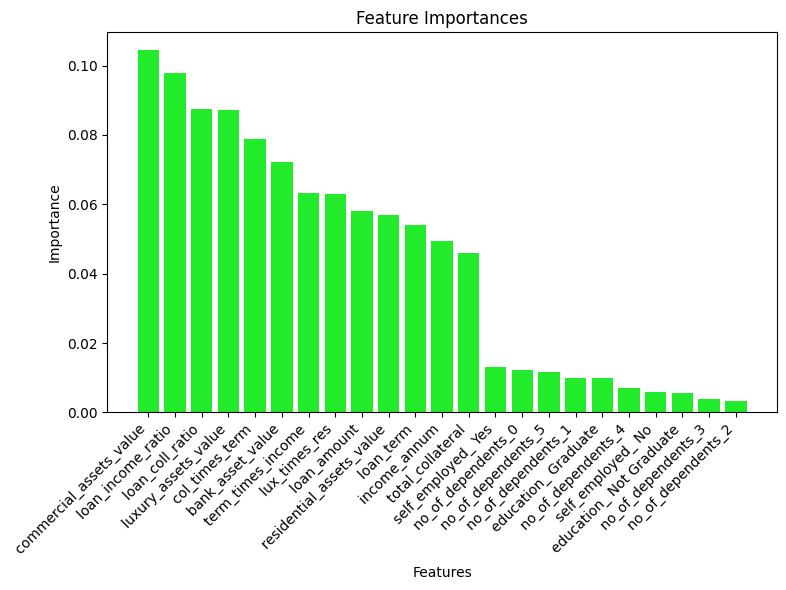

In [2]:
from preprocessing import get_preprocessed_df
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier
import multiprocessing as mp
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def get_results(holdout, model, chosen_features, y_test, y_pred):
    holdout_true = holdout[' loan_status']
    holdout.drop(columns=[' loan_status'], inplace=True)
    holdout_pred = model.predict(holdout[chosen_features])
    val_acc = accuracy_score(y_test, y_pred)
    holdout_f1 = f1_score(holdout_true, holdout_pred)
    holdout_acc = accuracy_score(holdout_true, holdout_pred)
    return val_acc, holdout_f1, holdout_acc



# Random Forest Classifier

In [4]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

number_of_features = 9
features = [' total_collateral',
     ' col_times_term',
     ' education_ Not Graduate',
     ' no_of_dependents_0',
     ' education_ Graduate',
     ' no_of_dependents_4',
     ' term_times_income',
     ' no_of_dependents_5',
     ' lux_times_res',
     ' loan_amount',
     ' loan_term',
     ' no_of_dependents_1',
     ' self_employed_ Yes',
     ' self_employed_ No',
     ' loan_coll_ratio',
     ' loan_income_ratio',
     ' commercial_assets_value',
     ' bank_asset_value']



hyperparameters = {
    "max_depth": 26,
    "random_state": 42,
    "min_samples_split": 7,
    "min_samples_leaf": 5,
    "bootstrap": True,
    "warm_start": False,
    "min_weight_fraction_leaf": 0.02223794874814192,
    "n_estimators": 220,
    'criterion': 'entropy',
    'n_jobs': -1
}

model = RandomForestClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)

print('------------------------------------ Without Cibil Score ------------------------------------')
print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')
print(f'val acc: {val_acc}')
print(f'holdout acc: {holdout_acc}')

x_train, x_test, y_train, y_test, holdout = get_preprocessed_df(with_cibil=True)
features.append(' cibil_score')
model = RandomForestClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, x_test, y_test, y_pred)

print('------------------------------------ With Cibil Score ------------------------------------')
print(f'holdout f1: {holdout_f1}')
print(f'holdout acc: {holdout_acc}')

------------------------------------ Without Cibil Score ------------------------------------
val f1: 0.7760758570386579
holdout f1: 0.759124087591241
val acc: 0.6405152224824356
holdout acc: 0.6135831381733021


ValueError: Boolean array expected for the condition, not int64

# GridSearch 

## Decision Tree Classifier

In [ ]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

hyperparameters = {'criterion': 'entropy', 
    'max_depth': 4, 
    'max_leaf_nodes': 37, 
    'min_impurity_decrease': 0.006, 
    'min_samples_leaf': 2, 
    'min_samples_split': 8, 
    'min_weight_fraction_leaf': 0}

model = DecisionTreeClassifier(**hyperparameters)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
holdout_true = holdout[' loan_status']
holdout.drop(columns=[' loan_status'], inplace=True)
holdout_pred = model.predict(holdout)
holdout_f1 = f1_score(holdout_true, holdout_pred)

print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')

------------------------------------ Without Cibil Score ------------------------------------
val f1: 0.7712230215827338
holdout f1: 0.76410998552822


## XGradient Boosting Classifier

In [6]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

parameters = {'learning_rate': 0.001, 
    'max_depth': 4, 
    'min_child_weight': 3, 
    'min_split_loss': 6, 
    'reg_alpha': 2, 
    'reg_lambda': 3, 
    'random_state': 42,
    'subsample': 0.9}

xgb = XGBClassifier(**parameters)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
holdout_true = holdout[' loan_status']
holdout.drop(columns=[' loan_status'], inplace=True)
holdout_pred = model.predict(holdout)
holdout_f1 = f1_score(holdout_true, holdout_pred)

print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')

val f1: 0.7750362844702468
holdout f1: 0.7616279069767442


## Gaussian NB

In [ ]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

parameters = {'var_smoothing': 1.0}

model = GaussianNB(parameters)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
holdout_true = holdout[' loan_status']
holdout.drop(columns=[' loan_status'], inplace=True)
holdout_pred = model.predict(holdout)
holdout_f1 = f1_score(holdout_true, holdout_pred)

print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')

val f1: 0.7712230215827338
holdout f1: 0.76410998552822


## KNeighbors

In [ ]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

parameters = {'algorithm': 'auto', 
    'n_neighbors': 31, 
    'p': 2, 
    'weights': 'uniform'}

model = KNeighborsClassifier(**parameters)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
holdout_true = holdout[' loan_status']
holdout.drop(columns=[' loan_status'], inplace=True)
holdout_pred = model.predict(holdout)
holdout_f1 = f1_score(holdout_true, holdout_pred)

print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')

val f1: 0.7484939759036143
holdout f1: 0.7386018237082066
